# COMP0189: Applied Artificial Intelligence
## Week 1 (Data Preprocessing)

### After this week you will be able to ...
- Load datasets using scikit-learn.
- Appreciate the importance of exploratory data analysis (EDA).
- Learn and apply various preprocessing techniques (scaling, encoding, handling missing values).
- Compare the impact of preprocessing on model performance.

### Acknowledgements
- https://github.com/UCLAIS/Machine-Learning-Tutorials
- https://www.cs.columbia.edu/~amueller/comsw4995s19/schedule/
- https://scikit-learn.org/stable/
- https://archive.ics.uci.edu/ml/datasets/adult

## Introduction to Scikit-learn


Why do we use sklearn??

1. Example Datasets
    - sklearn.datasets : Provides example datasets

2. Feature Engineering  
    - sklearn.preprocessing : Variable functions as to data preprocessing
    - sklearn.feature_selection : Help selecting primary components in datasets
    - sklearn.feature_extraction : Vectorised feature extraction
    - sklearn.decomposition : Algorithms regarding Dimensionality Reduction

3. Data split and Parameter Tuning  
    - sklearn.model_selection : 'Train Test Split' for cross validation, Parameter tuning with GridSearch

4. Evaluation  
    - sklearn.metrics : accuracy score, ROC curve, F1 score, etc.

5. ML Algorithms
    - sklearn.ensemble : Ensemble, etc.
    - sklearn.linear_model : Linear Regression, Logistic Regression, etc.
    - sklearn.naive_bayes : Gaussian Naive Bayes classification, etc.
    - sklearn.neighbors : Nearest Centroid classification, etc.
    - sklearn.svm : Support Vector Machine
    - sklearn.tree : DecisionTreeClassifier, etc.
    - sklearn.cluster : Clustering (Unsupervised Learning)

6. Utilities  
    - sklearn.pipeline: pipeline of (feature engineering -> ML Algorithms -> Prediction)

7. Train and Predict  
    - fit()
    - predict()

8. and more...

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## 1. Exploratory Data Analysis (EDA)
In this section, you will use two datasets to illustrate EDA for: 1) a regression task and 2) a classification task.

In [2]:
from sklearn.utils import Bunch

def load_boston():
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
    row_first_lines = raw_df.values[::2, :]
    row_second_lines = raw_df.values[1::2, :2]

    description_file = open("boston_description.txt", "r")
    
    data= np.hstack([row_first_lines[~np.isnan(row_first_lines)].reshape(506, 11), row_second_lines])
    target = raw_df.values[1::2, 2]
    feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
    description = description_file.read()

    return Bunch(data=data, target=target, feature_names=feature_names, DESCR=description)

### **1.1 Boston House Price Dataset** (regression task)

Let's first take a look at the Boston House Price dataset. This Dataset is deprecated as of version 1.2, but we will use this for educational purpose.



> Take some time to look at the different predictor variables. What do they mean and how do you expect them to influence the target variable (median house price)?






In [3]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
print('Boston dataset feature names: ', boston.feature_names)
print('Number of features: ', len(boston.feature_names))

Boston dataset feature names:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Number of features:  13


**Exploratory data analysis**

Why is this useful?
- Understand dataset characetristic in more detail (range, distribution, inter-variable relationships).
- Identify necessary preprocessing steps (handle missing values and outliers, encoding and scaling features..).

In [6]:
# convert the dataset into a dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
# extract the target variable
df['MEDV'] = boston.target

Basic statistics

In [10]:
print("Dataset sample:")
print(df.head())
print("Basic statistics:")
print(df.describe())

Dataset sample:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Basic statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   

Visualise the feature and target distributions - are all features continuous?

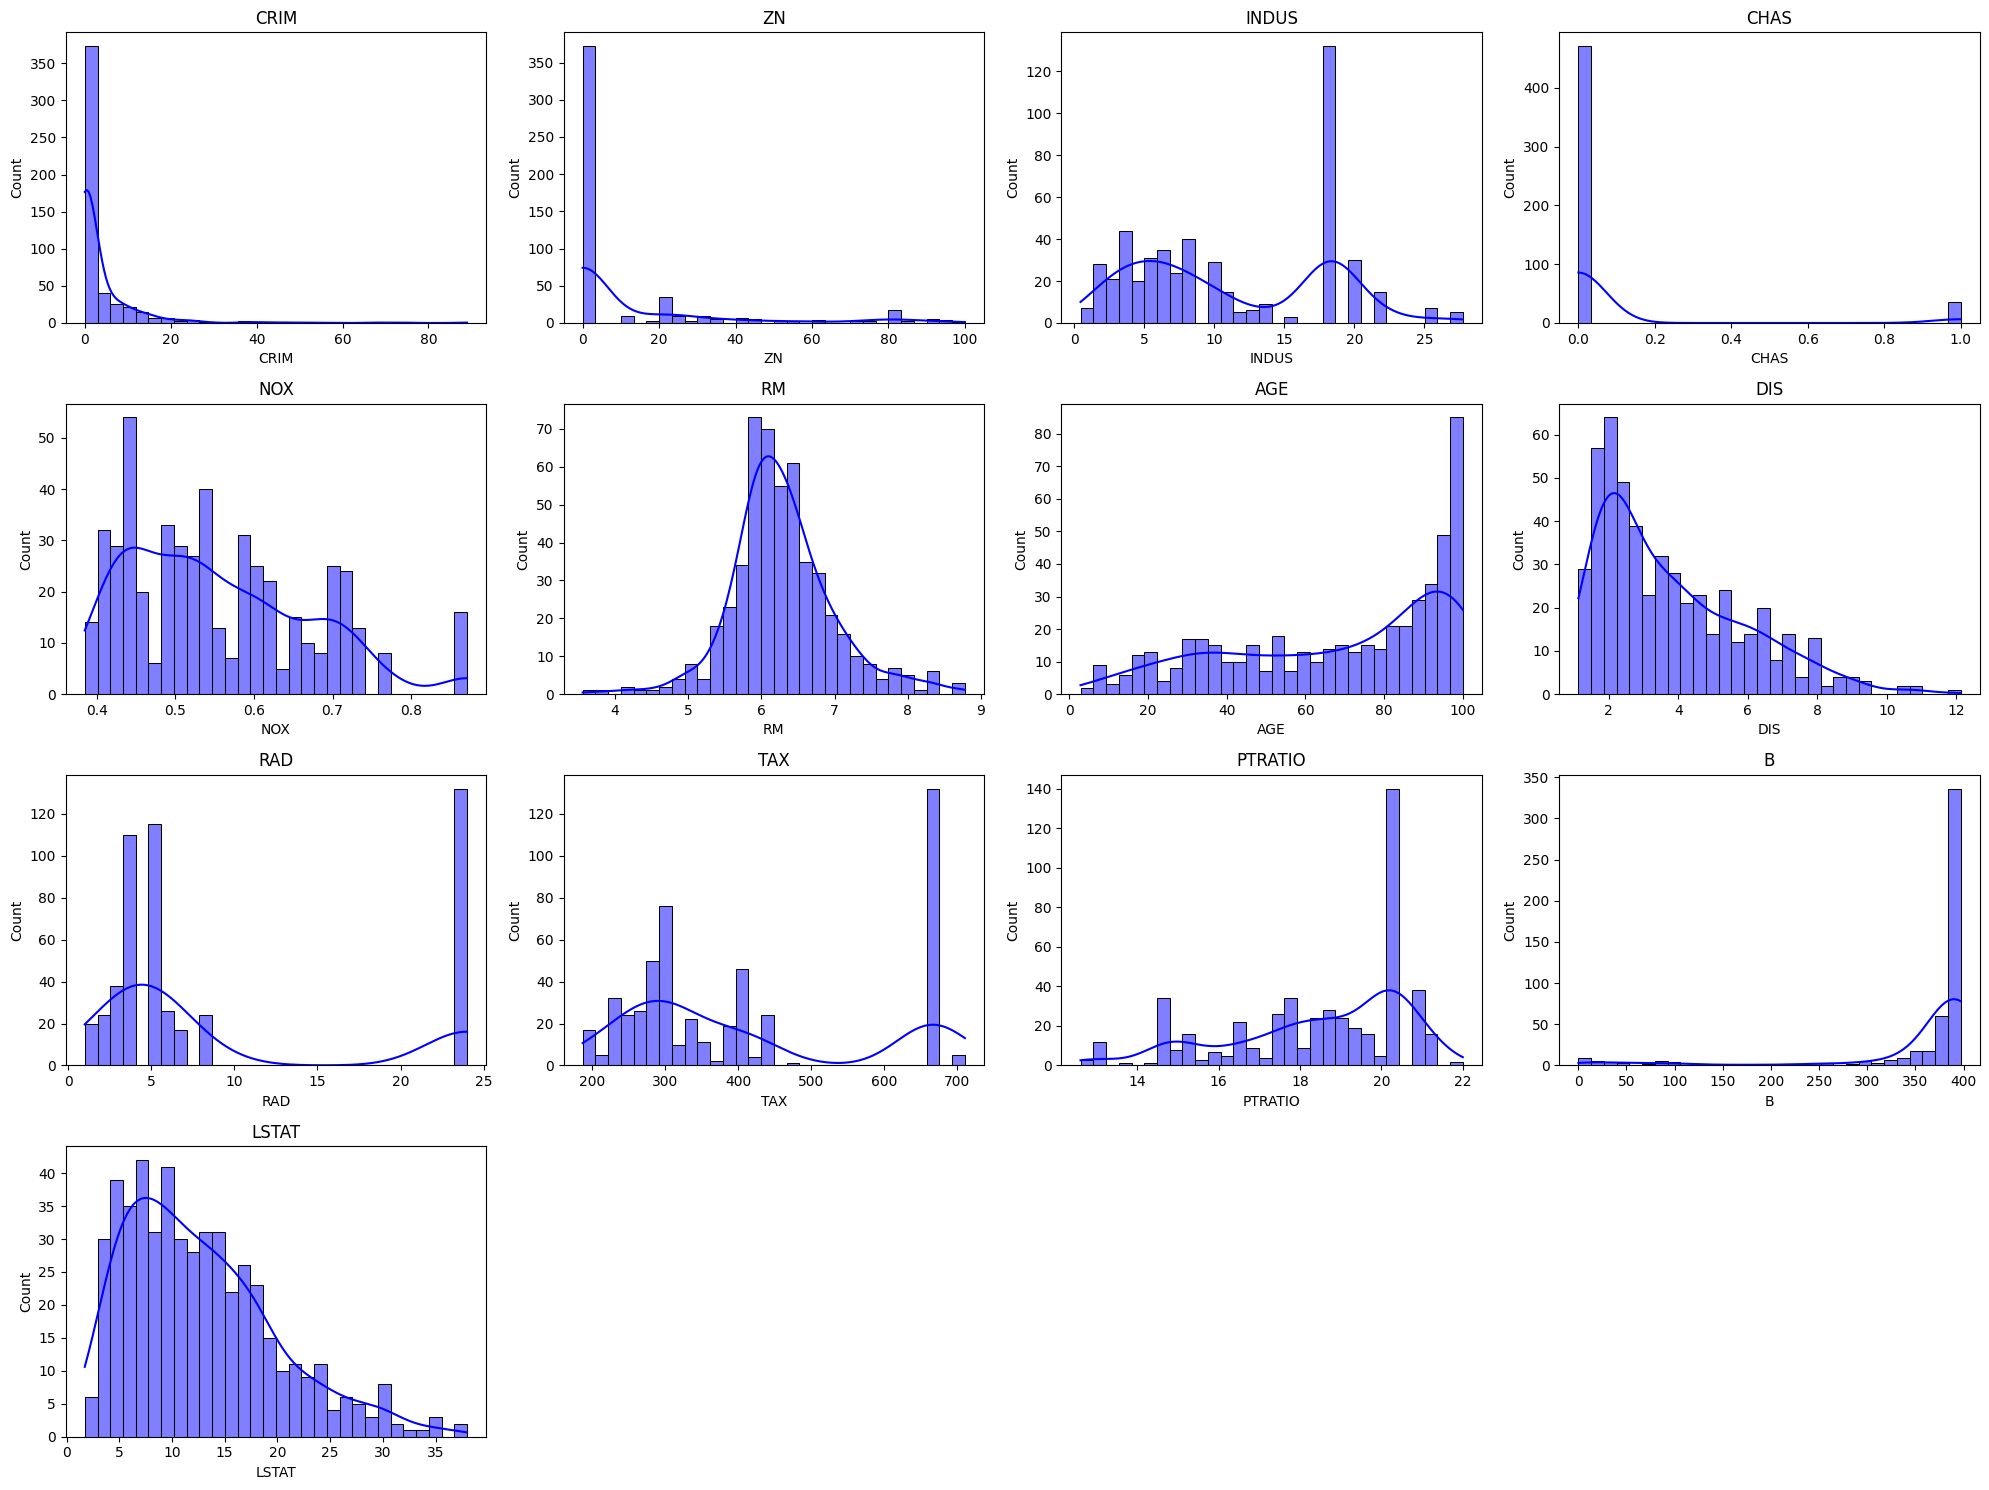

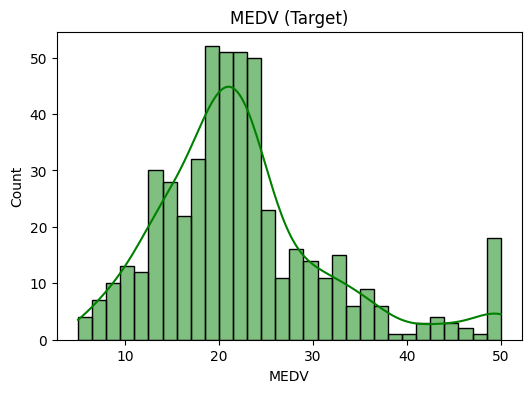

In [ ]:
# Your code here...
features = df.columns[:-1]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(feature)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['MEDV'], kde=True, bins=30, color='green')
plt.title('MEDV (Target)')
plt.show()

Are there any missing values?

In [13]:
# Your code here...
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Are there any outliers?

> Hint: you can use boxplots

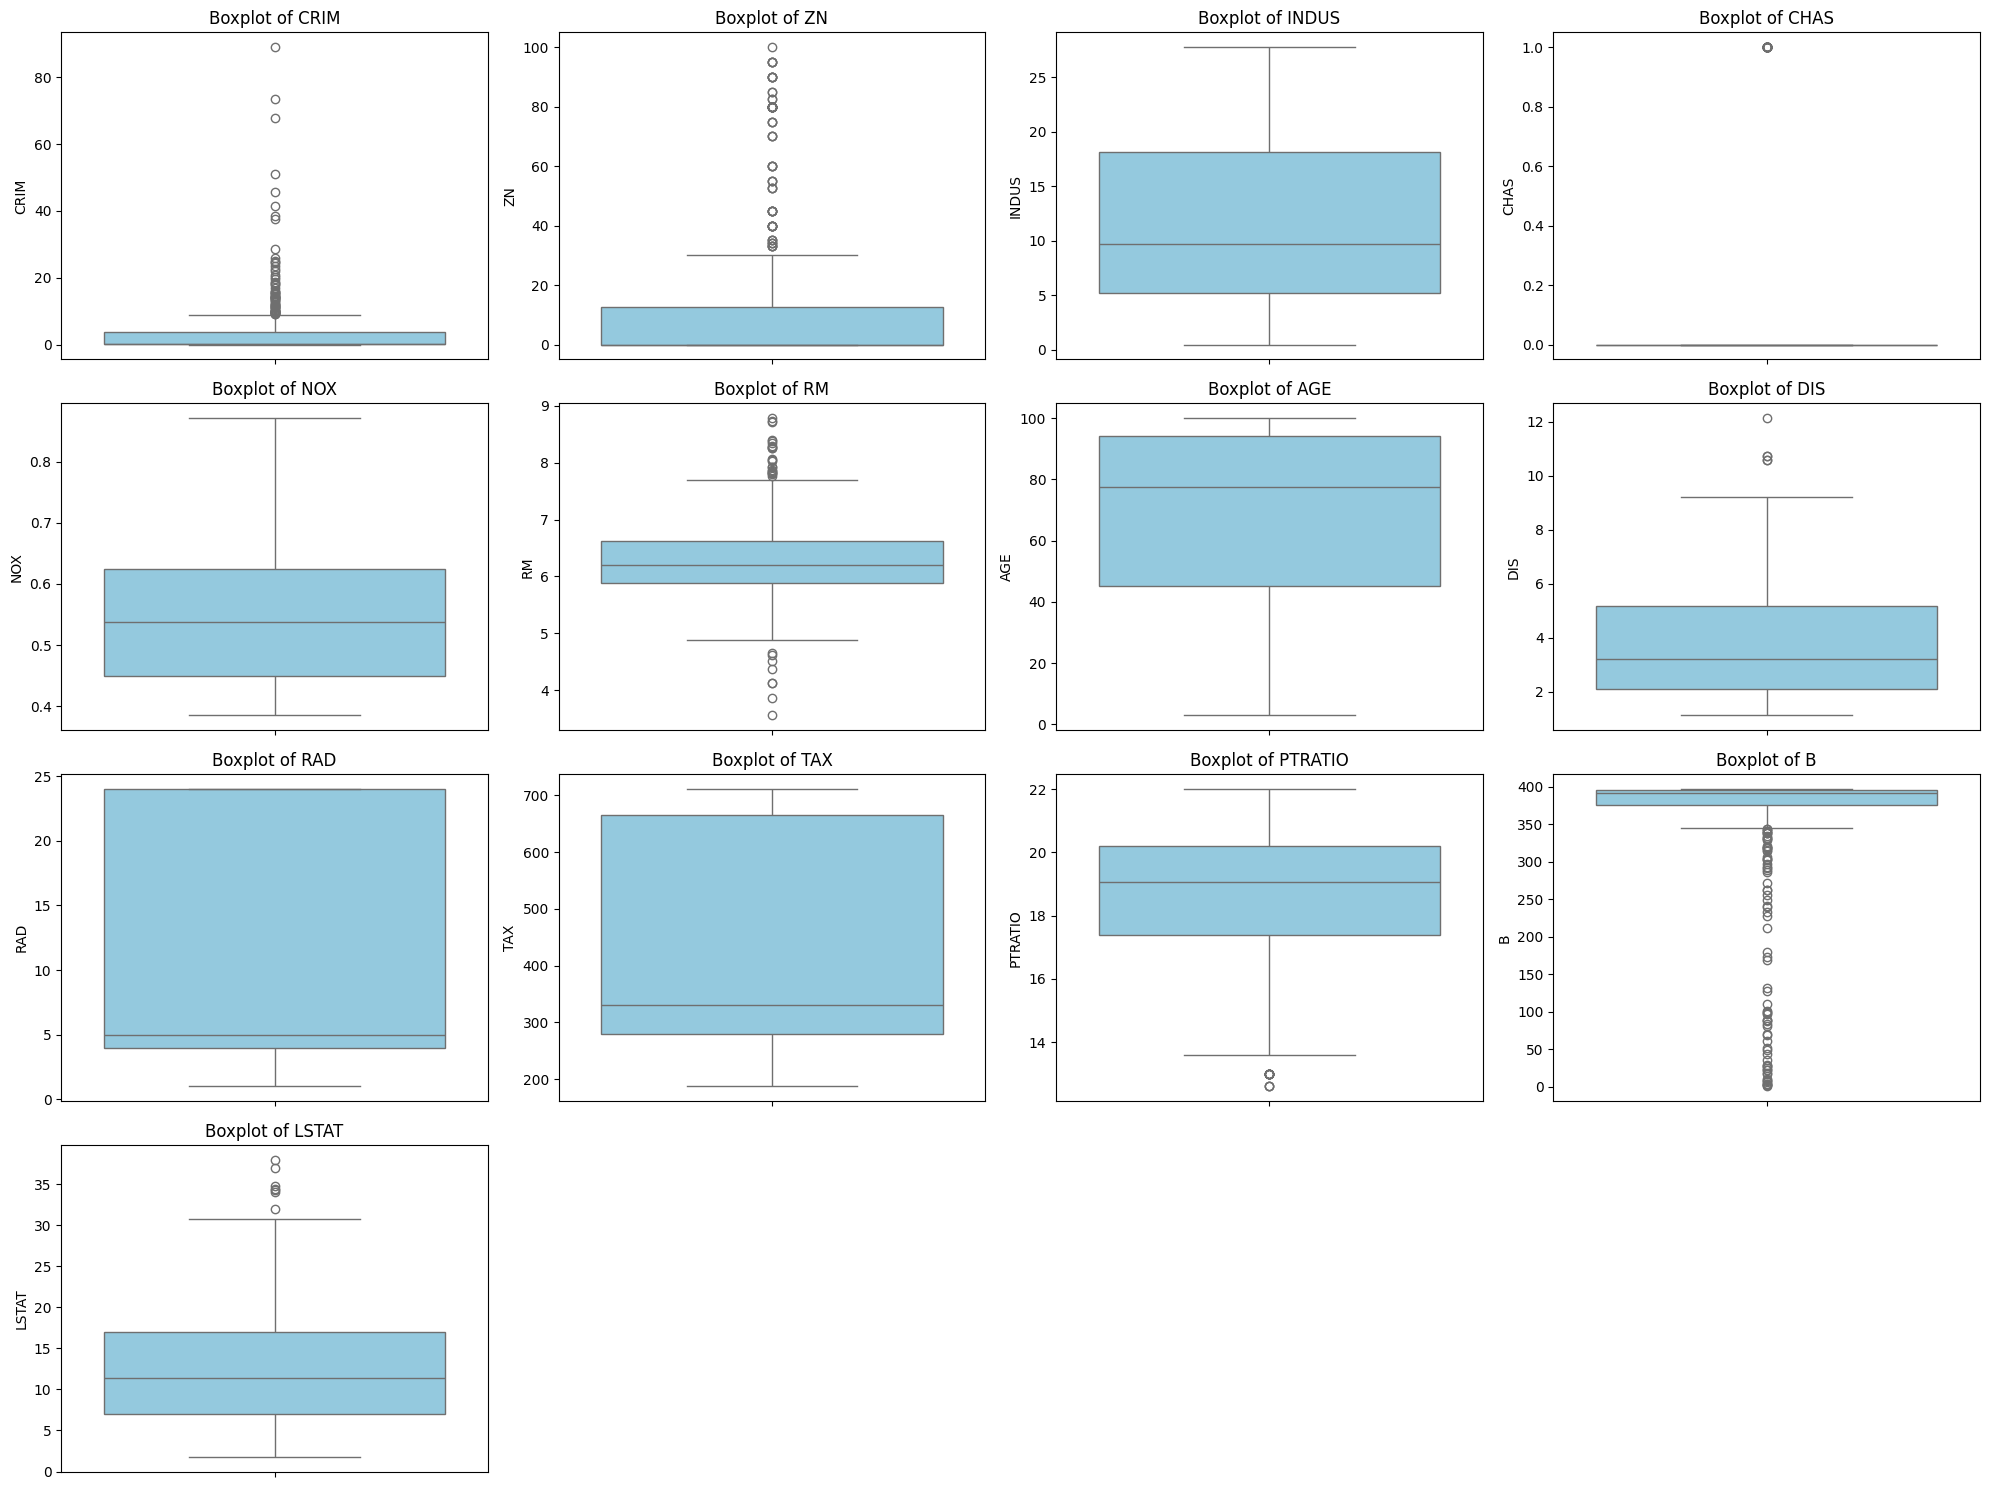

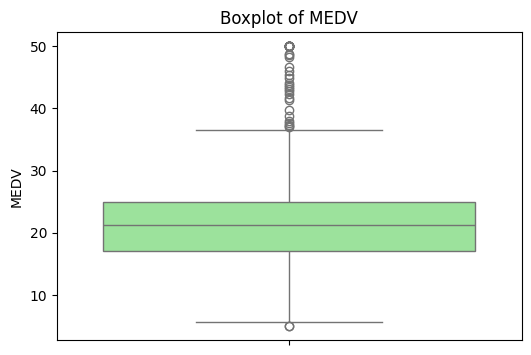

In [ ]:
# Your code here...
plt.figure(figsize=(20, 15))

for i, feature in enumerate(df.columns[:-1]): 
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}', fontsize=12)
    plt.tight_layout()

#outliers -> show as dots

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['MEDV'], color='lightgreen')
plt.title('Boxplot of MEDV', fontsize=12)
plt.show()

Investigate the relationships between features and the outcome variable.

> Hint: a correlation map may be useful

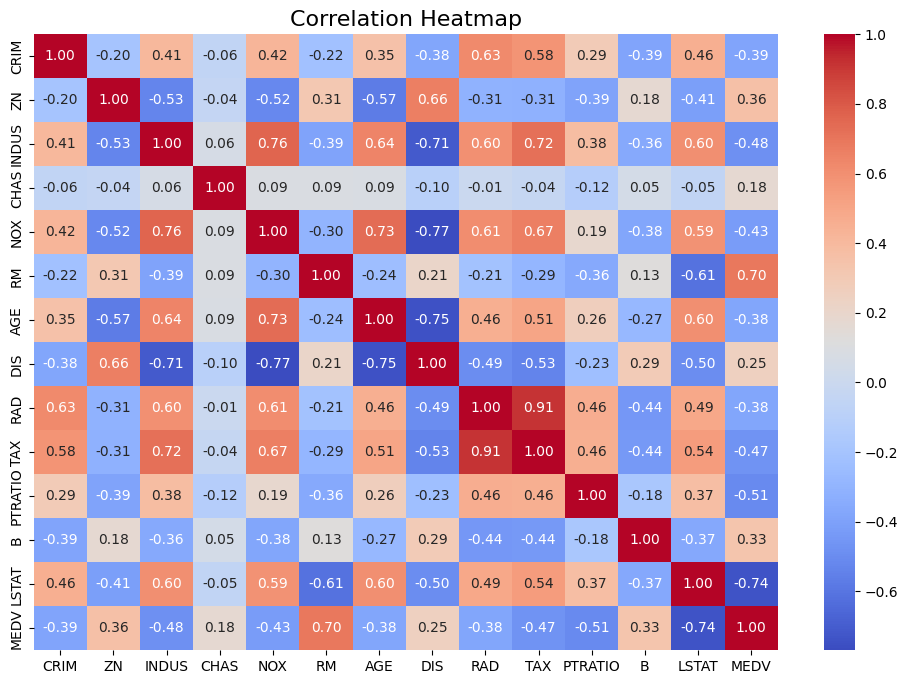

Correlation with MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [16]:
# Your code here...
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

correlation_with_medv = correlation_matrix['MEDV'].sort_values(ascending=False)
print("Correlation with MEDV:")
print(correlation_with_medv)

See how our data are spread in different ranges. 3rd feature (CHAS) is even in binary. Most of the algorithms perform poorly on these various input spaces.

Based on the EDA, what do you observe?
- Do some features need encoding?
- Do all feature share a similar range, or would they need scaling?
- Are there any outliers or missing values that need to be taken care of?

By addressing these questions, we inform our preprocessing choices and make sure that the data is properly prepared for the models.

### **1.2 Wine Dataset** (classification task)

In [7]:
from sklearn.datasets import load_wine

In [8]:
# Load and describe the dataset
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [9]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

**Exploratory data analysis**

Just like for the Boston housing dataset, you need to analyse the dataset's features and predictor variable relationships.

In [10]:
# convert into a dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)
# extract the target variable
df['Class'] = wine.target

Basic statistics




> Is the dataset balanced?



In [21]:
print("Dataset sample: ")
print(df.head())
print("Basic statistics:")
print(df.describe())

print("Dataset balance: ", df['Class'].value_counts())

Dataset sample: 
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Cla

How are the featues distributed?

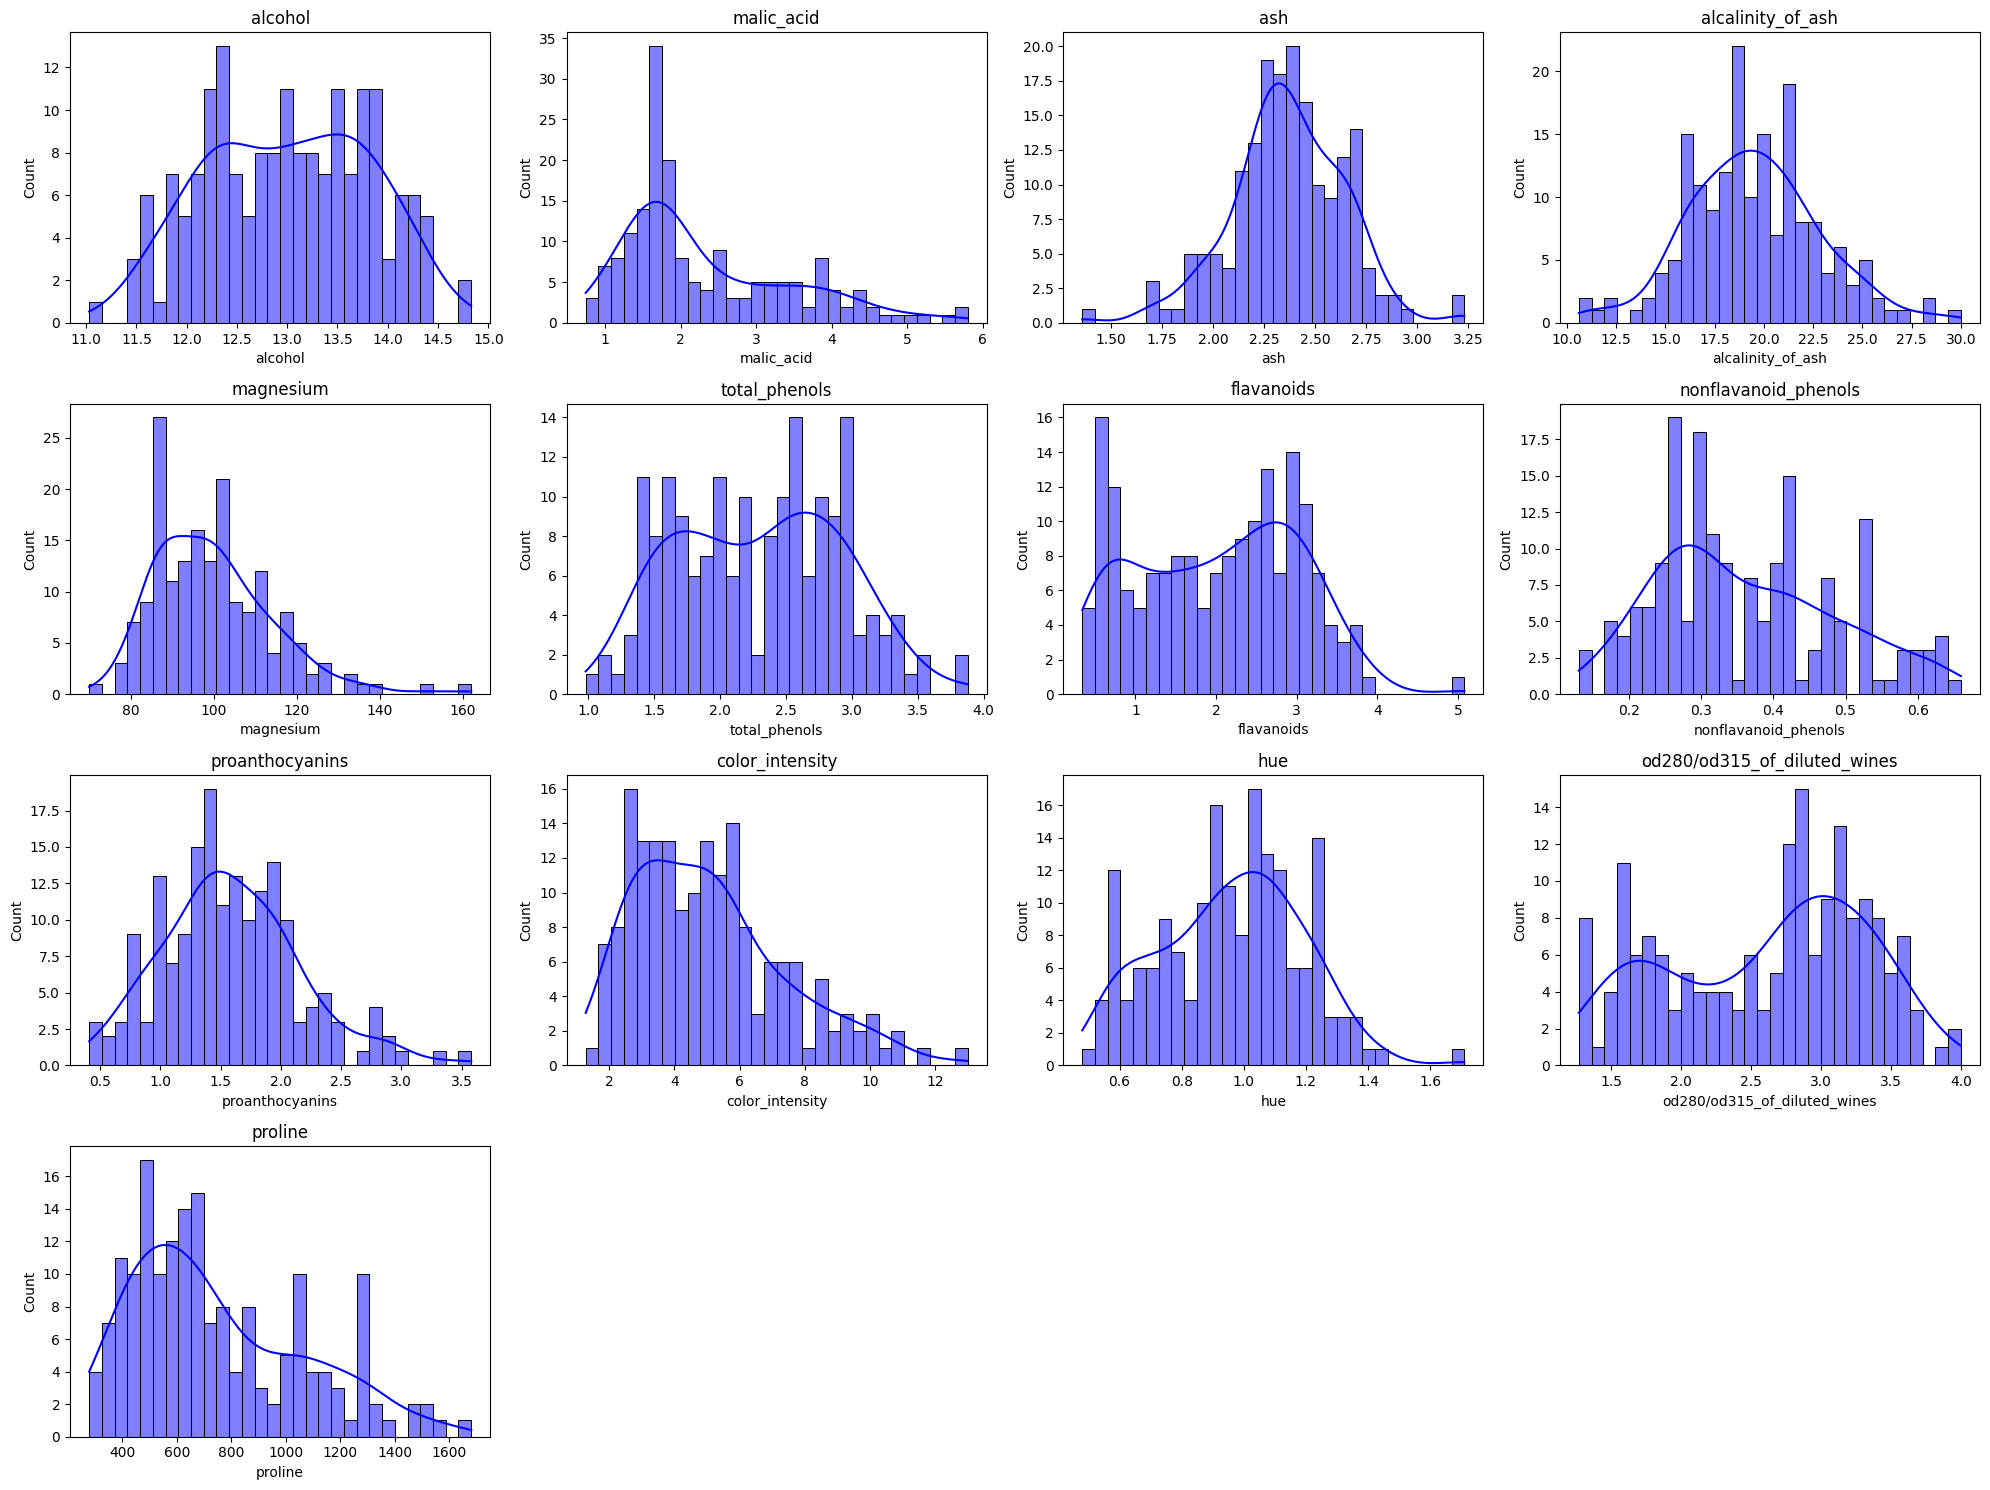

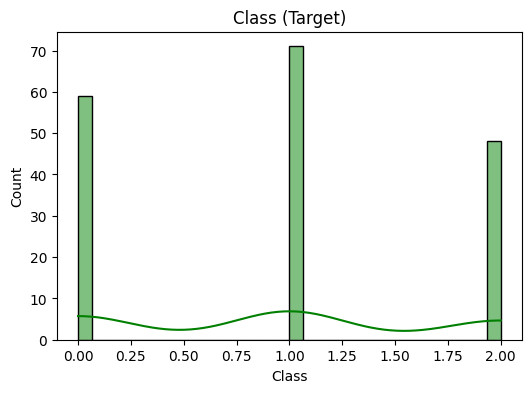

In [22]:
# Your code here...
features = df.columns[:-1]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(feature)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['Class'], kde=True, bins=30, color='green')
plt.title('Class (Target)')
plt.show()

Are there any missing values? Outliers?

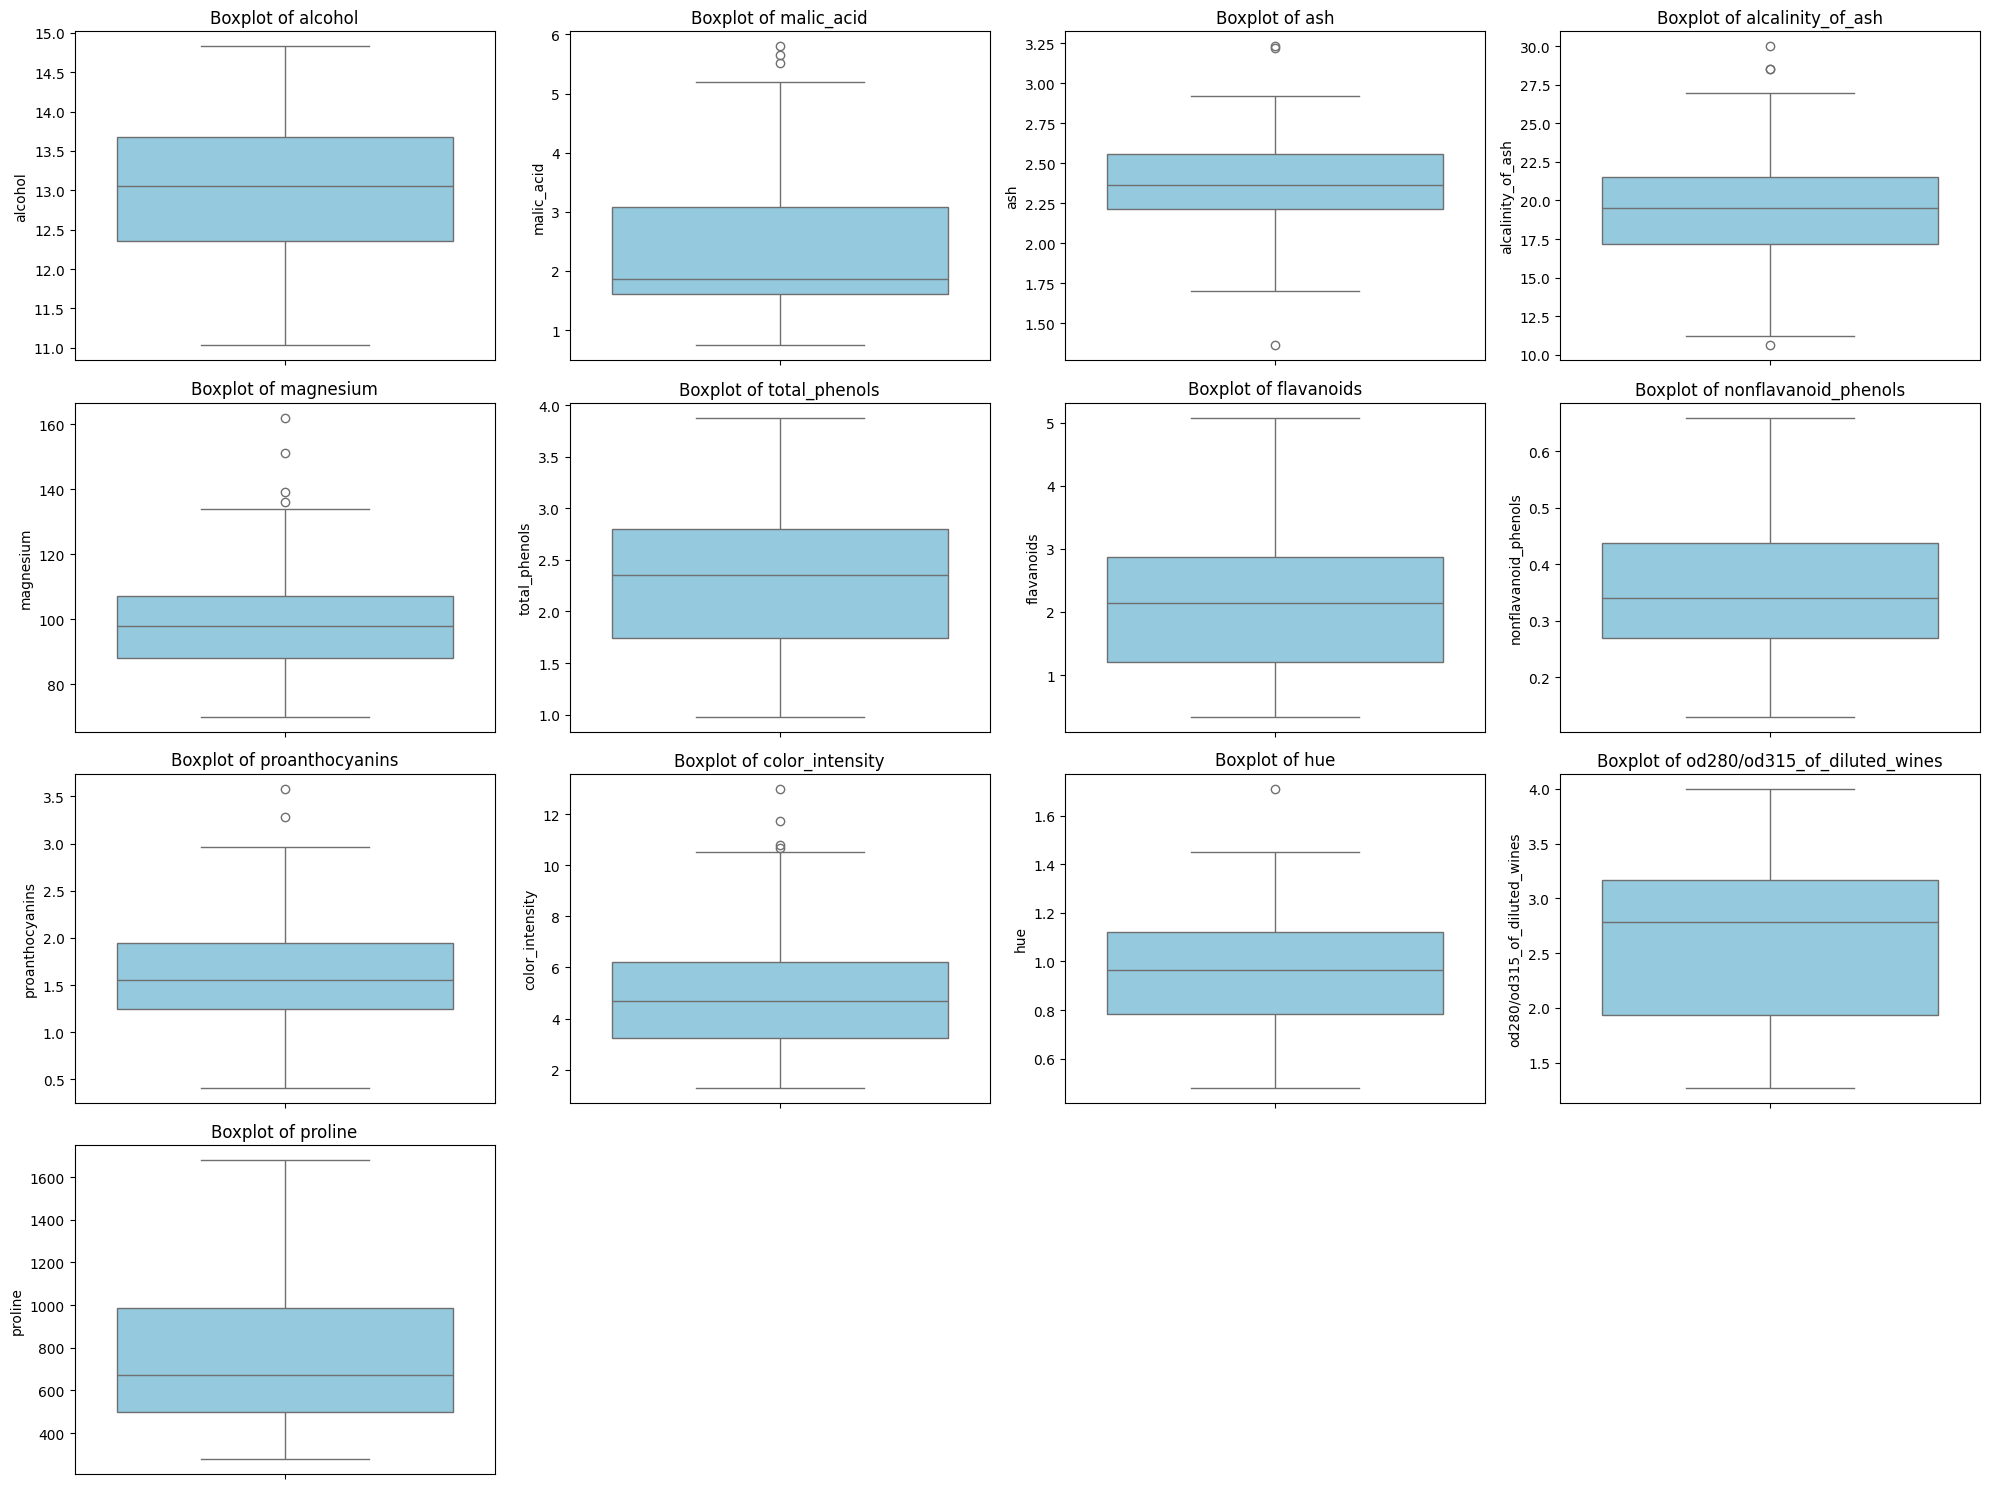

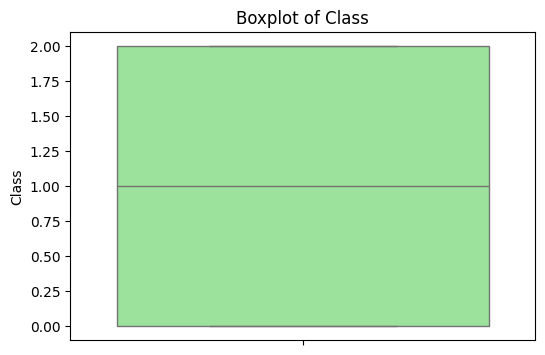

In [23]:
# Your code here...
plt.figure(figsize=(20, 15))

for i, feature in enumerate(df.columns[:-1]): 
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}', fontsize=12)
    plt.tight_layout()

#outliers -> show as dots

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Class'], color='lightgreen')
plt.title('Boxplot of Class', fontsize=12)
plt.show()

How do the feature correlate with the outcome?

> Hint: plot feature distributions stratified on outcome.

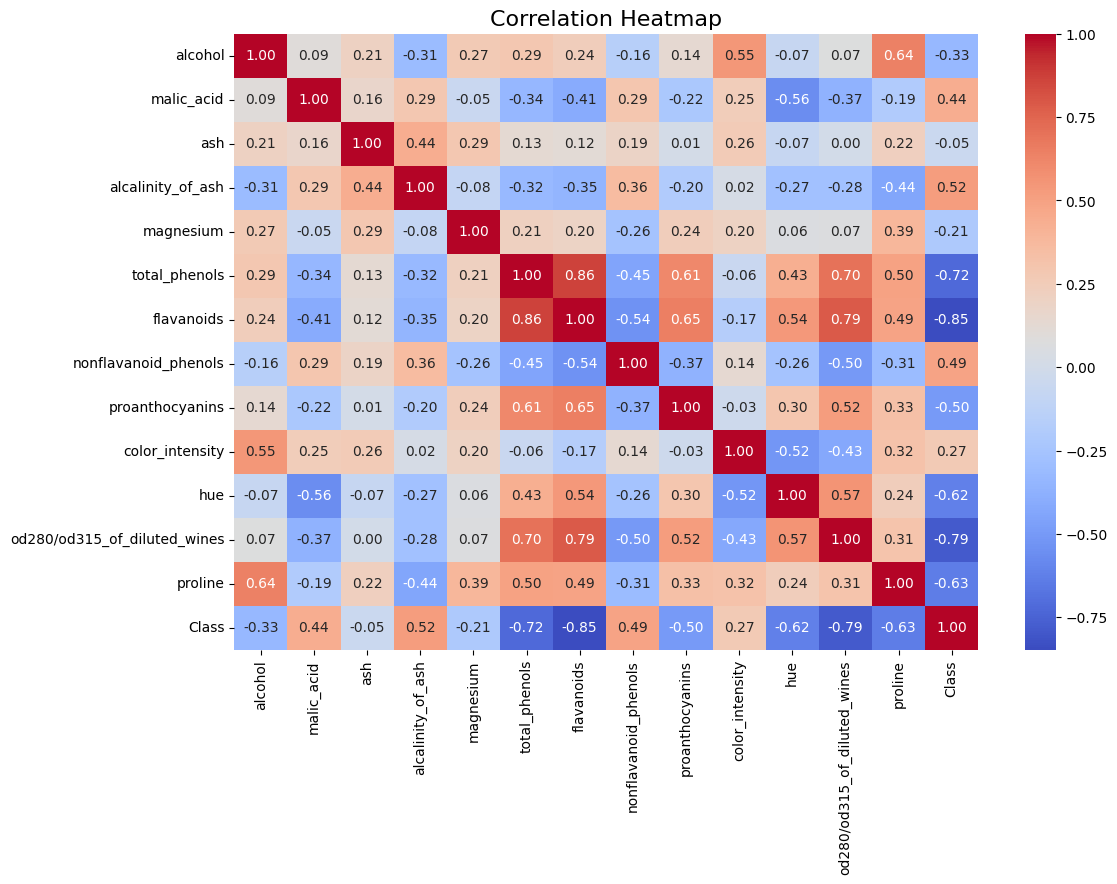

Correlation with Class:
Class                           1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: Class, dtype: float64


In [24]:
# Your code here...
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

correlation_with_medv = correlation_matrix['Class'].sort_values(ascending=False)
print("Correlation with Class:")
print(correlation_with_medv)

## 2. Investigating impact of pre-processing on differentent models

In this section, you have to design: <br>
<br>1) A model to predict the wine class of different wine samples (wine dataset).
<br>2) A model to predict the house price class (boston dataset).

Try out different models and compare them.


Based on the EDA, what preprocessing steps are needed? Try to compare different preprocessing methods (e.g., feature scaling methods) to assess their impact on the models.

Helpful imports

In [11]:
# some models..
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# evaluation metrics..
from sklearn.metrics import accuracy_score, root_mean_squared_error, r2_score
#root_mean_squared_error only available in scikit-learn version>1.4


# different scalers to try out..
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# if you want to make a pipeline
from sklearn.pipeline import make_pipeline

# to split data into train and test sets..
from sklearn.model_selection import train_test_split

### Example: Impact of feature scaling

Normalization scales each input variable separately to the range 0-1.  
Standardization scales each input variable separately by subtracting the mean (centering) and dividing each of them by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

#### Example usage of sklearn.preprocessing.StandardScaler

In [12]:
# Example
unscaled_data = np.asarray([[100, 0.001],
 [8, 0.05],
 [50, 0.005],
 [88, 0.07],
 [4, 0.1]])
# define standard scaler
scaler = StandardScaler()
# transform data
scaled_data = scaler.fit_transform(unscaled_data)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

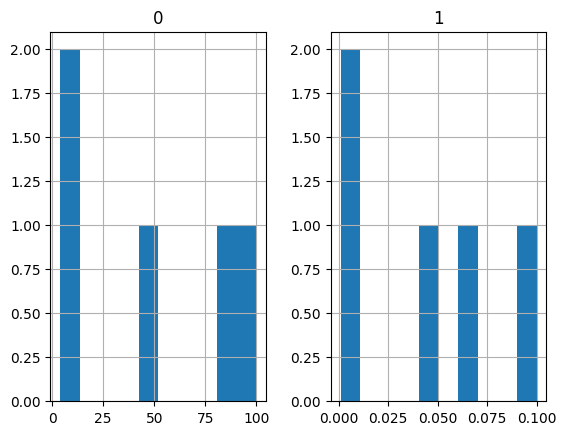

In [13]:
pd.DataFrame(unscaled_data).hist()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

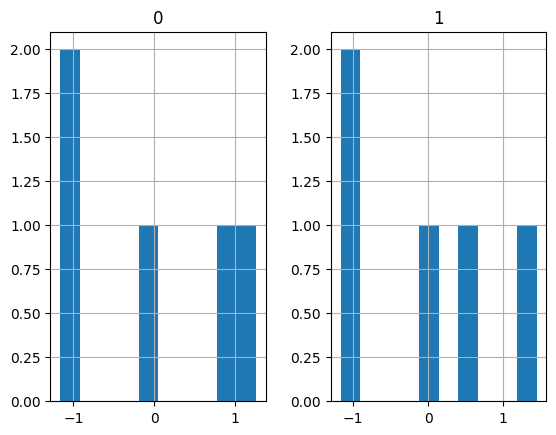

In [14]:
pd.DataFrame(scaled_data).hist()

In [15]:
del scaled_data, unscaled_data, scaler

**Tasks**  
- Try using different scaling methods, such as MinMaxScaler and Normalisation. Do you see the difference in the histogram?
- Experiment the effects of different feature scaling methods on various ML algorithms e.g. KNN, SVM, Decision-Tree.

#### Scaling Vs. Unscaling the Wine Dataset

In [16]:
RANDOM_STATE = 42
# We are using the wine dataset
features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=RANDOM_STATE)

In [17]:
scalers = {
    'None': None,
    'MinMaxScaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE)
}

results = {}

for scaler_name, scaler in scalers.items():
    
    if scaler is not None:
        scaler.fit(X_train)
        scaled_X_train = scaler.transform(X_train)
        scaled_X_test = scaler.transform(X_test)
    else:
        scaled_X_train = X_train
        scaled_X_test = X_test
    
    for model_name, model in models.items():
        
        model.fit(scaled_X_train, y_train) 
        unscaled_y_hat = model.predict(scaled_X_test)
        unscaled_acc = accuracy_score(y_test, unscaled_y_hat)

        if scaler is not None:
            model.fit(scaled_X_train, y_train)
            scaled_y_hat = model.predict(scaled_X_test)
            scaled_acc = accuracy_score(y_test, scaled_y_hat)
            results[f"{scaler_name} - {model_name}"] = {
                #'Unscaled Accuracy': unscaled_acc,
                'Scaled Accuracy': scaled_acc
            }
        #R2 better close to 1 (0-1)
        #RMSE better close to 0
        else:
            results[f"{scaler_name} - {model_name}"] = {
                'Unscaled Accuracy': unscaled_acc,
            }

results_df = pd.DataFrame(results).T
print(results_df)


                              Unscaled Accuracy  Scaled Accuracy
None - KNN                             0.740741              NaN
None - SVM                             0.759259              NaN
None - Decision Tree                   0.962963              NaN
MinMaxScaler - KNN                          NaN         0.944444
MinMaxScaler - SVM                          NaN         0.981481
MinMaxScaler - Decision Tree                NaN         0.962963
Normalizer - KNN                            NaN         0.759259
Normalizer - SVM                            NaN         0.462963
Normalizer - Decision Tree                  NaN         0.962963


In [18]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

scalers = {
    'None': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=RANDOM_STATE),
    'SVR': SVR()
}

results = {}

for scaler_name, scaler in scalers.items():
    
    if scaler is not None:
        scaler.fit(X_train)
        scaled_X_train = scaler.transform(X_train)
        scaled_X_test = scaler.transform(X_test)
    else:
        scaled_X_train = X_train
        scaled_X_test = X_test
    
    for model_name, model in models.items():
        
        model.fit(scaled_X_train, y_train)
        unscaled_y_hat = model.predict(scaled_X_test)
        unscaled_rmse = np.sqrt(root_mean_squared_error(y_test, unscaled_y_hat))
        unscaled_r2 = r2_score(y_test, unscaled_y_hat)

        if scaler is not None:
            model.fit(scaled_X_train, y_train)
            scaled_y_hat = model.predict(scaled_X_test)
            scaled_rmse = np.sqrt(root_mean_squared_error(y_test, scaled_y_hat))
            scaled_r2 = r2_score(y_test, scaled_y_hat)
            results[f"{scaler_name} - {model_name}"] = {
                #'RMSE': unscaled_rmse,
                #'R2': unscaled_r2,
                'Scaled RMSE': scaled_rmse,
                'Scaled R2': scaled_r2
            }
        else:
            results[f"{scaler_name} - {model_name}"] = {
                'RMSE': unscaled_rmse,
                'R2': unscaled_r2,
            }

results_df = pd.DataFrame(results).T
print(results_df)


                                        RMSE        R2  Scaled RMSE  Scaled R2
None - Linear Regression            2.220046  0.668759          NaN        NaN
None - Random Forest                1.676593  0.892253          NaN        NaN
None - SVR                          2.696108  0.279481          NaN        NaN
StandardScaler - Linear Regression       NaN       NaN     2.220046   0.668759
StandardScaler - Random Forest           NaN       NaN     1.677188   0.892100
StandardScaler - SVR                     NaN       NaN     2.250869   0.649977
MinMaxScaler - Linear Regression         NaN       NaN     2.220046   0.668759
MinMaxScaler - Random Forest             NaN       NaN     1.677035   0.892139
MinMaxScaler - SVR                       NaN       NaN     2.298414   0.619452


## 3. Working with a messier dataset: **Adult Census Dataset**

Classification task: predict whether income >50K

### 3.1 Exploratory data analysis
Same as before, analyse the dataset to identify the necessary preprocessing steps.

In [20]:
# Open the csv file and skim through it. It does not have column names
# so we will allocate names to each column

# Naming the Columns
names = ['age','workclass','fnlwgt','education',
        'marital-status','occupation','relationship','race','sex',
        'capital-gain','capital-loss','hours-per-week','native-country',
        'y']

# Load dataset with specifying ' ?' as missing values
df = pd.read_csv('adult.data', delimiter=',', names=names, na_values=' ?')

# Number of observations
print("Number of observations: ", len(df))

# Look at sample of data
df.head(5)

Number of observations:  32561


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Basis statistics

In [21]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


Is the datset balanced?

In [22]:
print("Dataset balance: ", df['y'].value_counts())

Dataset balance:  y
<=50K    24720
>50K      7841
Name: count, dtype: int64


Disribution of features and relationship to target variabe

> Hint: plot feature distribution stratified on the predictor variable

> Inspect the range and cardinality of the different features. Is the range consistent across the numerical features? How many categories do categorical variables have?


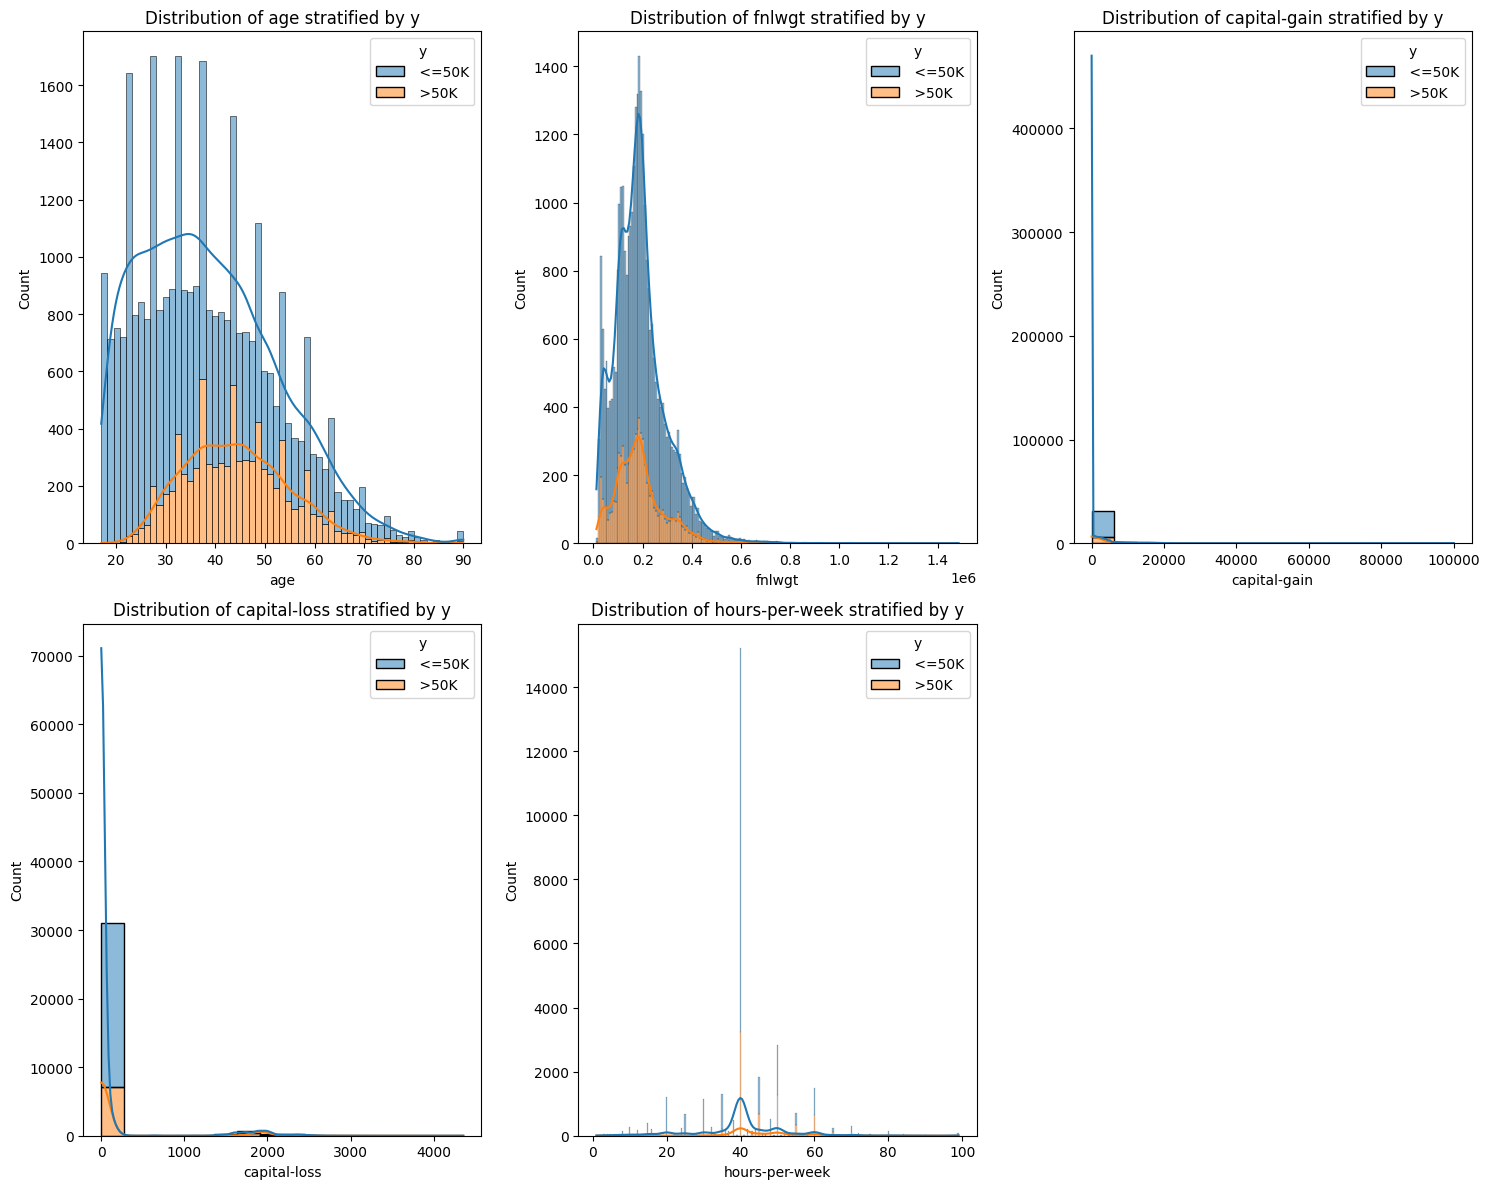

In [23]:
# Your code here...
numerical_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
target = 'y'

plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue=target, kde=True, multiple="stack")
    plt.title(f'Distribution of {feature} stratified by {target}')
    plt.tight_layout()
    
plt.show()

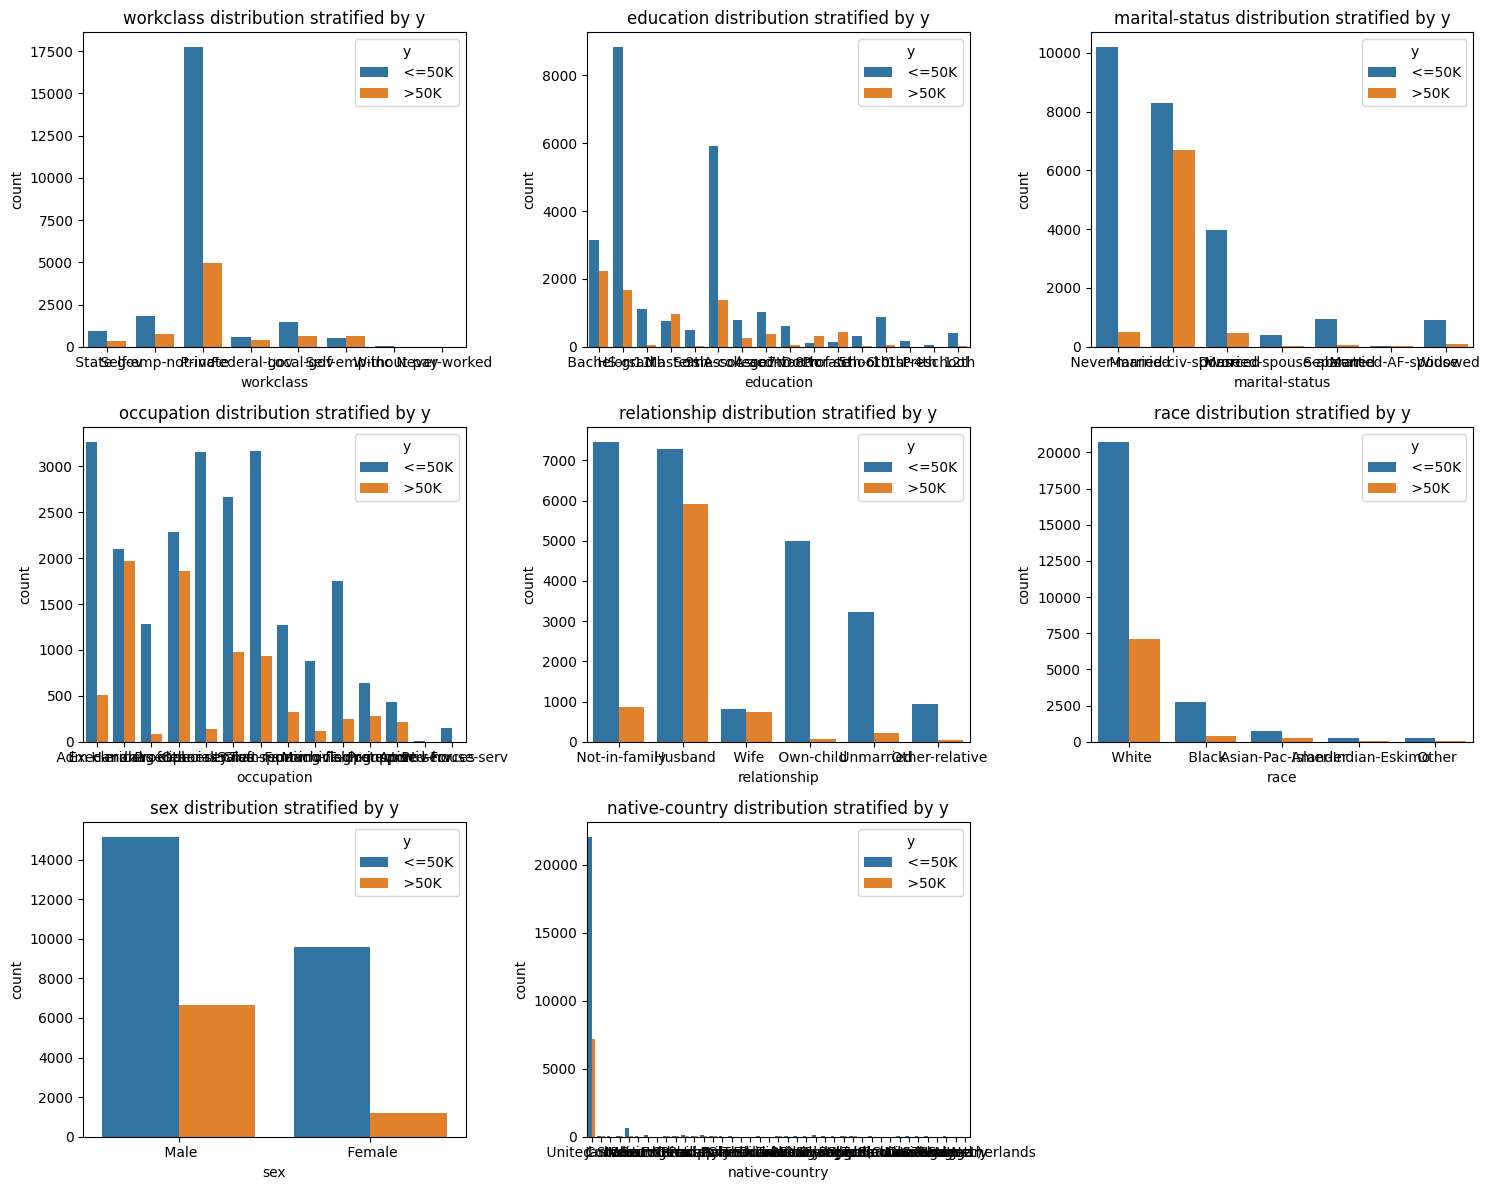

In [24]:
# Plot distributions for categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue=target, data=df)
    plt.title(f'{feature} distribution stratified by {target}')
    plt.tight_layout()

plt.show()

In [25]:
print(df[numerical_features].describe())
for feature in categorical_features:
    print(f"{feature} has {df[feature].nunique()} unique categories")

                age        fnlwgt  capital-gain  capital-loss  hours-per-week
count  32561.000000  3.256100e+04  32561.000000  32561.000000    32561.000000
mean      38.581647  1.897784e+05   1077.648844     87.303830       40.437456
std       13.640433  1.055500e+05   7385.292085    402.960219       12.347429
min       17.000000  1.228500e+04      0.000000      0.000000        1.000000
25%       28.000000  1.178270e+05      0.000000      0.000000       40.000000
50%       37.000000  1.783560e+05      0.000000      0.000000       40.000000
75%       48.000000  2.370510e+05      0.000000      0.000000       45.000000
max       90.000000  1.484705e+06  99999.000000   4356.000000       99.000000
workclass has 8 unique categories
education has 16 unique categories
marital-status has 7 unique categories
occupation has 14 unique categories
relationship has 6 unique categories
race has 5 unique categories
sex has 2 unique categories
native-country has 41 unique categories


Check for missing values

In [26]:
# Your code here...
missing_values = df.isnull().sum()
print("Missing values for each column:\n", missing_values)

Missing values for each column:
 age                  0
workclass         1836
fnlwgt               0
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
y                    0
dtype: int64


In [27]:
# Example the 15th row of the DataFrame - notice NaN
row_15 = df.iloc[14]
print(row_15)

age                                40
workclass                     Private
fnlwgt                         121772
education                   Assoc-voc
marital-status     Married-civ-spouse
occupation               Craft-repair
relationship                  Husband
race               Asian-Pac-Islander
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country                    NaN
y                                >50K
Name: 14, dtype: object


### 3.2 Data preprocessing
Based on the EDA, what type of preprocessing is needed?
- Do features need to be scaled and encoded?
- Do missing values need to be imputed?

A quick data fix

In [28]:
# For now, we will drop the rows with missing (NA) values
df = df.dropna()
len(df)

30162

In [29]:
# Task: Get the unique values in the race and y column
df['race'].unique()
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [30]:
# We see redundant space prefix in the values. Remove them.
df['race'] = df['race'].apply(lambda x: x.strip())

In [31]:
df['race'].unique(), df['y'].unique(), df['occupation'].unique()

(array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
        'Other'], dtype=object),
 array([' <=50K', ' >50K'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repair', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object))

Hmmm it's not just the race and y column.

In [32]:
# Let's try to apply this to all the string-valued columns
for col_name in df.columns:
    if df[col_name].dtype == object:  # Checking for object type (string in pandas)
        df[col_name] = df[col_name].apply(lambda x: x.strip() if isinstance(x, str) else x)


Check the data

In [33]:
for col_name in df.columns:
    if not 'int' in str(df[col_name].dtype):
        print(df[col_name].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal

All done! You can now start data preprocessing such as encoding and imputation.

#### **TASK 1: Encoding categorical variables** (label/ordinal encoding & one-hot encoding)

Important: We need special care when we are encoding categorical variables

**1. Take care of the missing values**
- Beware not to encode missing values unless you are intending to do so.
- Sometimes you want to encode missing values to a separate cateogory. For example, when you want to predict if passengers of titanic had survived or not, missing data of certain features can actually have meaning, i.e., Cabin information can be missing because the body was not found.

**2. Know which encoding and scaling method you should select**
- If your categories are ordinal, then it makes sense to use a LabelEncoder with a MinMaxScaler. For example, you can encode [low, medium, high], as [1,2,3], i.e., distance between low to high is larger than that of medium and high.

- However, if you have non-ordinal categorical values, like [White, Hispanic, Black, Asian], then it would be better to use a OneHotEncoder instead of forcing ordinality with a LabelEncoder. Otherwise the algorithms you use (especially distance based algorithms like KNN) will make the assumption that the distance between White and Asian is larger than White and Hispanic, which is nonsensical.

**3. Split before you encode to avoid data leakage**
- If training a model using train/ test slit, you should split the dataset before you encode your data. It is natural for algorithms to see unknown values in the validation/test set that was not appearing in the train set. `sklearn.preprocessing.OneHotEncoder` is good at handling these unknown categories (`handle_unknown` parameter).

- Discussion: What if you are certain about all the possible categories that can appear for each feature? Can you encode all the values before splitting the dataset into train and test set?


This notebook shows the three points in the following sections with examples.



> What type of encoding is most appropriate for the different categorical features? For example, should education and native-country be encoded using the same technique?



In [34]:
# Import encoders from sklearn
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [35]:
# Ordinal Encoding for 'education'
# Define the order of education categories
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Bachelors', 'Masters', 'Doctorate']
# Initialize the OrdinalEncoder with the specified categories
ordinal_encoder = OrdinalEncoder(categories=[education_order])
# Apply the OrdinalEncoder to the 'education' column
df['education_encoded'] = ordinal_encoder.fit_transform(df[['education']])

# Check resulting education ordering
edu_map = {}
for i, row in df[["education", "education_encoded"]].iterrows():
    education = row["education"]
    edu_num = row["education_encoded"]

    if education not in edu_map:
        edu_map.update({education: edu_num})
    else:
        assert edu_map[education] == edu_num
edu_map


{'Bachelors': 13.0,
 'HS-grad': 8.0,
 '11th': 6.0,
 'Masters': 14.0,
 '9th': 4.0,
 'Some-college': 9.0,
 'Assoc-acdm': 11.0,
 '7th-8th': 3.0,
 'Doctorate': 15.0,
 'Assoc-voc': 10.0,
 'Prof-school': 12.0,
 '5th-6th': 2.0,
 '10th': 5.0,
 'Preschool': 0.0,
 '12th': 7.0,
 '1st-4th': 1.0}

In [ ]:
# OneHotEncoding for nominal features without an implied order
# Including the previously missed nominal columns
nominal_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
onehot_encoder = OneHotEncoder(sparse_output=False)
#not sparse=False
onehot_encoded_columns = onehot_encoder.fit_transform(df[nominal_columns])
column_names = onehot_encoder.get_feature_names_out(nominal_columns)
df_onehot_encoded = pd.DataFrame(onehot_encoded_columns, columns=column_names)

# Integrate these new columns back into the original dataframe
df = df.reset_index(drop=True)  # Reset index to align with the new onehot encoded DataFrame
df = pd.concat([df, df_onehot_encoded], axis=1)

# Optionally, remove the categorical columns if no longer needed
df.drop(columns=nominal_columns + ['education'], inplace=True)

# Label Encoding for the target variable
label_encoder = LabelEncoder()
df['y_encoded'] = label_encoder.fit_transform(df['y'])

# Remove the original 'y' column if no longer needed
df.drop(columns=['y'], inplace=True)

Check your encoding results

In [40]:
# Display the first few rows of the modified DataFrame
df.head(10)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,education_encoded,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,y_encoded
0,39,77516,2174,0,40,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,50,83311,0,0,13,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,38,215646,0,0,40,8.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,53,234721,0,0,40,6.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,28,338409,0,0,40,13.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,37,284582,0,0,40,14.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6,49,160187,0,0,16,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,52,209642,0,0,45,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
8,31,45781,14084,0,50,14.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
9,42,159449,5178,0,40,13.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


#### **TASK 2: Dealing with missing data** - imputation strategies

In processing the data earlier, we did not take account of the missing values.

In [41]:
# Re-Load dataset with specifying ' ?' as missing values
df = pd.read_csv('adult.data', delimiter=',', names=names, na_values=' ?')
# Remove redundant space (same as before)
for col_name in df.columns:
    if df[col_name].dtype == object:  # Checking for object type (string in pandas)
        df[col_name] = df[col_name].apply(lambda x: x.strip() if isinstance(x, str) else x) # Remove redundant space

**Task**: Create 3 train/test datasets using different methods for dealing with missing data:
<br>A: Drop missing values, B: KNN imputation, C: Most frequent imputation


In [61]:
from sklearn.model_selection import train_test_split
import numpy as np

def train_test_split_df(df, test_ratio=0.3, target_col="y", random_state=42):
    # Separate features and target
    df_data = df.drop(columns=[target_col])
    df_target = df[target_col]

    # Randomized train-test split with a fixed seed
    train_X_df, test_X_df, train_y_df, test_y_df = train_test_split(
        df_data, df_target, test_size=test_ratio, random_state=random_state
    )

    # Convert target variable to binary (assuming it's categorical with ">50K" and others)
    train_y_df = np.where(train_y_df == ">50K", 1, 0)
    test_y_df = np.where(test_y_df == ">50K", 1, 0)

    return train_X_df, train_y_df, test_X_df, test_y_df

# Split your data into train and test splits

train_X, train_y, test_X, test_y = train_test_split_df(df)

print(len(train_X))
print(len(train_y))
print(len(test_X))
print(len(test_y))

22792
22792
9769
9769


In [62]:
# Check for missing values
print(train_X.isnull().sum())
print(test_X.isnull().sum())

age                  0
workclass         1267
fnlwgt               0
education            0
marital-status       0
occupation        1274
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     405
dtype: int64
age                 0
workclass         569
fnlwgt              0
education           0
marital-status      0
occupation        569
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    178
dtype: int64


Step 1: encode features without missing values
<br> `native-country`, `occupation` and `workclass` have missing values, so we first need to impute them before encoding

In [63]:
# Ordinal Encoding for 'education'
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th',
                   '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc',
                   'Assoc-acdm', 'Prof-school', 'Bachelors', 'Masters', 'Doctorate']
ordinal_encoder = OrdinalEncoder(categories=[education_order])

train_X['education_encoded'] = ordinal_encoder.fit_transform(train_X[['education']])
test_X['education_encoded'] = ordinal_encoder.transform(test_X[['education']])

# OneHotEncoding for nominal features without missing values and without an implied order
nominal_columns_without_missing = ['marital-status', 'relationship', 'race', 'sex']  # These have no missing values
onehot_encoder = OneHotEncoder(sparse_output=False)

# Fit on training data and apply to both train and test
train_onehot_encoded = onehot_encoder.fit_transform(train_X[nominal_columns_without_missing])
test_onehot_encoded = onehot_encoder.transform(test_X[nominal_columns_without_missing])

# Create DataFrames for one-hot encoded columns
train_onehot_df = pd.DataFrame(train_onehot_encoded, columns=onehot_encoder.get_feature_names_out(nominal_columns_without_missing))
test_onehot_df = pd.DataFrame(test_onehot_encoded, columns=onehot_encoder.get_feature_names_out(nominal_columns_without_missing))

# Reset indices for consistency and combine data
train_X = train_X.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)
train_X = pd.concat([train_X, train_onehot_df], axis=1)
test_X = pd.concat([test_X, test_onehot_df], axis=1)

# Drop the original nominal and 'education' columns from both datasets
train_X.drop(columns=nominal_columns_without_missing + ['education'], inplace=True)
test_X.drop(columns=nominal_columns_without_missing + ['education'], inplace=True)

# Verify the transformed datasets
print("Training data (X):")
train_X.head()


Training data (X):


,age,workclass,fnlwgt,occupation,capital-gain,capital-loss,hours-per-week,native-country,education_encoded,marital-status_Divorced,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,34,Self-emp-not-inc,56460,Farming-fishing,0,2179,12,United-States,8.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,48,Self-emp-not-inc,243631,Craft-repair,7688,0,40,United-States,9.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,23,State-gov,56402,Prof-specialty,0,0,30,United-States,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,56,Local-gov,255406,Exec-managerial,0,0,40,United-States,8.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,17,Private,297246,Priv-house-serv,0,0,9,United-States,6.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


**Dataset A:** drop missing values (same as dataset in Task 1).

In [64]:
# A: Dataset with dropped missing values
# Drop rows with missing values in the training and testing datasets
train_X_dropna = train_X.copy()
test_X_dropna = test_X.copy()

train_X_dropna = train_X_dropna.dropna()
test_X_dropna = test_X_dropna.dropna()

# Ensure alignment by dropping the corresponding rows in y
train_y_dropna = train_y[train_X_dropna.index]
test_y_dropna = test_y[test_X_dropna.index]

# Display missing value counts for train and test datasets
print("Missing values in training data after dropping rows:")
print(train_X_dropna.isnull().sum())

print("\nMissing values in testing data after dropping rows:")
print(test_X_dropna.isnull().sum())

# Display dataset lengths after dropping rows with missing values
print(f"\n\nDataset length after dropping rows containing NA (train): {len(train_X_dropna)}")
print(f"Dataset length after dropping rows containing NA (test): {len(test_X_dropna)}")

Missing values in training data after dropping rows:
age                                     0
workclass                               0
fnlwgt                                  0
occupation                              0
capital-gain                            0
capital-loss                            0
hours-per-week                          0
native-country                          0
education_encoded                       0
marital-status_Divorced                 0
marital-status_Married-AF-spouse        0
marital-status_Married-civ-spouse       0
marital-status_Married-spouse-absent    0
marital-status_Never-married            0
marital-status_Separated                0
marital-status_Widowed                  0
relationship_Husband                    0
relationship_Not-in-family              0
relationship_Other-relative             0
relationship_Own-child                  0
relationship_Unmarried                  0
relationship_Wife                       0
race_Amer-Indian-Eskimo

**Dataset B:** KNN imputation



> NOTE: Typically you would not use KNN imputation for categorical columns.
Instead use a more appropriate imputation method such as most frequent imputation
since KNN is best suited to numerical variables.
However to illustrate KNN imputation on this dataset here is a workaround
by first ordinal encoding, then applying KNN, then converting back to original categories
(this is not an ideal solution as ordinal encoding will introduce bias if the
variable is not ordinal. Also, one-hot encoding and then KNN-imputation would not work, can you think why?).



In [65]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Columns with missing values
columns_with_missing_values = ['workclass', 'occupation', 'native-country']

# Apply KNN Imputation separately for train and test
# Training data
train_X_knn_imputed = train_X.copy()

# Temporarily encode categorical columns with missing values
temp_encoder = OrdinalEncoder()
train_temp = train_X[columns_with_missing_values].copy()
train_temp_encoded = temp_encoder.fit_transform(train_temp)

# Fit KNN imputer on the training data
knn_imputer = KNNImputer(n_neighbors=5)
train_imputed_data = knn_imputer.fit_transform(train_temp_encoded)

# Decode the categorical columns back to original categories for training data
train_imputed_data_decoded = temp_encoder.inverse_transform(train_imputed_data)
train_imputed_final = pd.DataFrame(train_imputed_data_decoded, columns=columns_with_missing_values)

# Integrate the imputed columns back into the training DataFrame
train_X_knn_imputed[columns_with_missing_values] = train_imputed_final

# Testing data
test_X_knn_imputed = test_X.copy()

# Temporarily encode categorical columns with missing values
test_temp = test_X[columns_with_missing_values].copy()
test_temp_encoded = temp_encoder.transform(test_temp)  # Use the encoder fitted on training data

# Apply KNN imputer to the testing data (fit is not called again)
test_imputed_data = knn_imputer.transform(test_temp_encoded)

# Decode the categorical columns back to original categories for testing data
test_imputed_data_decoded = temp_encoder.inverse_transform(test_imputed_data)
test_imputed_final = pd.DataFrame(test_imputed_data_decoded, columns=columns_with_missing_values)

# Integrate the imputed columns back into the testing DataFrame
test_X_knn_imputed[columns_with_missing_values] = test_imputed_final

# Ensure alignment by dropping the corresponding rows in y
train_y_knn_imputed = train_y[train_X_knn_imputed.index]
test_y_knn_imputed = test_y[test_X_knn_imputed.index]

# Verify missing values in the resulting datasets
print("Missing values in training data after KNN imputation:")
print(train_X_knn_imputed.isnull().sum())

print("\nMissing values in testing data after KNN imputation:")
print(test_X_knn_imputed.isnull().sum())


Missing values in training data after KNN imputation:
age                                     0
workclass                               0
fnlwgt                                  0
occupation                              0
capital-gain                            0
capital-loss                            0
hours-per-week                          0
native-country                          0
education_encoded                       0
marital-status_Divorced                 0
marital-status_Married-AF-spouse        0
marital-status_Married-civ-spouse       0
marital-status_Married-spouse-absent    0
marital-status_Never-married            0
marital-status_Separated                0
marital-status_Widowed                  0
relationship_Husband                    0
relationship_Not-in-family              0
relationship_Other-relative             0
relationship_Own-child                  0
relationship_Unmarried                  0
relationship_Wife                       0
race_Amer-Indian-Eskim

In [47]:
# check resulting df
train_X_knn_imputed.head(5)

,age,workclass,fnlwgt,occupation,capital-gain,capital-loss,hours-per-week,native-country,education_encoded,marital-status_Divorced,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,34,Self-emp-not-inc,56460,Farming-fishing,0,2179,12,United-States,8.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,48,Self-emp-not-inc,243631,Craft-repair,7688,0,40,United-States,9.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,23,State-gov,56402,Prof-specialty,0,0,30,United-States,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,56,Local-gov,255406,Exec-managerial,0,0,40,United-States,8.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,17,Private,297246,Priv-house-serv,0,0,9,United-States,6.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


**Dataset C:** Most frequent imputation

In [66]:
from sklearn.impute import SimpleImputer

# Columns with missing values
columns_with_missing_values = ['workclass', 'occupation', 'native-country']

# Training data
train_X_mode_imputed = train_X.copy()

# Create an imputer object using the most frequent strategy and fit on training data
mode_imputer = SimpleImputer(strategy='most_frequent')
train_X_mode_imputed[columns_with_missing_values] = mode_imputer.fit_transform(train_X_mode_imputed[columns_with_missing_values])

# Testing data
test_X_mode_imputed = test_X.copy()

# Apply the trained imputer to the testing data
test_X_mode_imputed[columns_with_missing_values] = mode_imputer.transform(test_X_mode_imputed[columns_with_missing_values])

# Ensure alignment by dropping the corresponding rows in y
train_y_mode_imputed = train_y[train_X_mode_imputed.index]
test_y_mode_imputed = test_y[test_X_mode_imputed.index]

# Verify missing values in the resulting datasets
print("Missing values in training data after mode imputation:")
print(train_X_mode_imputed.isnull().sum())

print("\nMissing values in testing data after mode imputation:")
print(test_X_mode_imputed.isnull().sum())

Missing values in training data after mode imputation:
age                                     0
workclass                               0
fnlwgt                                  0
occupation                              0
capital-gain                            0
capital-loss                            0
hours-per-week                          0
native-country                          0
education_encoded                       0
marital-status_Divorced                 0
marital-status_Married-AF-spouse        0
marital-status_Married-civ-spouse       0
marital-status_Married-spouse-absent    0
marital-status_Never-married            0
marital-status_Separated                0
marital-status_Widowed                  0
relationship_Husband                    0
relationship_Not-in-family              0
relationship_Other-relative             0
relationship_Own-child                  0
relationship_Unmarried                  0
relationship_Wife                       0
race_Amer-Indian-Eski

Now that we have done data imputation, we can **encode the columns that had missing values** (`native-country`, `occupation` and `workclass`).  



> What type(s) of encoding is appropriate here?



In [67]:
from sklearn.preprocessing import OneHotEncoder

# Function to perform one-hot encoding
def apply_onehot_encoding(train_df, test_df, columns, encoder=None):
    # Fit OneHotEncoder on training data if no encoder is passed
    if encoder is None:
        encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
        #set handle_unknown='ignore' because we may encounter new categories in the test set
        encoder.fit(train_df[columns])

    # Transform both training and testing datasets
    train_encoded = encoder.transform(train_df[columns])
    test_encoded = encoder.transform(test_df[columns])

    # Create DataFrames for the encoded columns
    column_names = encoder.get_feature_names_out(columns)
    train_encoded_df = pd.DataFrame(train_encoded, columns=column_names)
    test_encoded_df = pd.DataFrame(test_encoded, columns=column_names)

    # Reset indices to ensure alignment and concatenate
    train_df_reset = train_df.reset_index(drop=True)
    test_df_reset = test_df.reset_index(drop=True)

    train_df_final = pd.concat([train_df_reset.drop(columns, axis=1), train_encoded_df.reset_index(drop=True)], axis=1)
    test_df_final = pd.concat([test_df_reset.drop(columns, axis=1), test_encoded_df.reset_index(drop=True)], axis=1)

    return train_df_final, test_df_final, encoder


# Columns to encode
columns_to_encode = ['native-country', 'occupation', 'workclass']

# Apply one-hot encoding for each imputed dataset (dropna, KNN, mode)

# 1. Dropna
train_X_dropna_encoded, test_X_dropna_encoded, encoder_dropna = apply_onehot_encoding(train_X_dropna, test_X_dropna, columns_to_encode)


# 2. KNN Imputed
train_X_knn_encoded, test_X_knn_encoded, encoder_knn = apply_onehot_encoding(train_X_knn_imputed, test_X_knn_imputed, columns_to_encode, encoder_dropna)


# 3. Mode Imputed
train_X_mode_encoded, test_X_mode_encoded, encoder_mode = apply_onehot_encoding(train_X_mode_imputed, test_X_mode_imputed, columns_to_encode, encoder_dropna)

# Verify if any missing values remain after encoding
print("Missing values in dropna-encoded training data:", train_X_dropna_encoded.isnull().sum().sum())
print("Missing values in dropna-encoded testing data:", test_X_dropna_encoded.isnull().sum().sum())

print("\nMissing values in KNN-encoded training data:", train_X_knn_encoded.isnull().sum().sum())
print("Missing values in KNN-encoded testing data:", test_X_knn_encoded.isnull().sum().sum())

print("\nMissing values in mode-encoded training data:", train_X_mode_encoded.isnull().sum().sum())
print("Missing values in mode-encoded testing data:", test_X_mode_encoded.isnull().sum().sum())

Missing values in dropna-encoded training data: 0
Missing values in dropna-encoded testing data: 0

Missing values in KNN-encoded training data: 0
Missing values in KNN-encoded testing data: 0

Missing values in mode-encoded training data: 0
Missing values in mode-encoded testing data: 0


### 3.3 Train a classifier to predict outcome

Example: SVM or KNN Classifier

**Task**: Train a classifier on the different datasets to compare imputation method accuracy.

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Non-categorical features to scale
non_categorical_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']


def scale_features(train_X, test_X, features_to_scale):
    scaler = StandardScaler()

    # Fit scaler on training data and transform both train and test sets
    train_scaled = scaler.fit_transform(train_X[features_to_scale])
    test_scaled = scaler.transform(test_X[features_to_scale])

    # Replace scaled features in the original DataFrame, maintaining indices
    train_X_scaled = train_X.copy()
    test_X_scaled = test_X.copy()
    train_X_scaled[features_to_scale] = pd.DataFrame(train_scaled, index=train_X.index, columns=features_to_scale)
    test_X_scaled[features_to_scale] = pd.DataFrame(test_scaled, index=test_X.index, columns=features_to_scale)

    return train_X_scaled, test_X_scaled


# Define classifiers
classifiers = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Datasets for each imputation type
datasets = {
    'Dropna': (train_X_dropna_encoded, train_y_dropna, test_X_dropna_encoded, test_y_dropna),
    'KNN Imputation': (train_X_knn_encoded, train_y_knn_imputed, test_X_knn_encoded, test_y_knn_imputed),
    'Mode Imputation': (train_X_mode_encoded, train_y_mode_imputed, test_X_mode_encoded, test_y_mode_imputed)
}

# Store results
results = []

# Train and test classifiers on each dataset
for imputation_type, (train_X, train_y, test_X, test_y) in datasets.items():
    # Apply scaling to non-categorical features
    train_X_scaled, test_X_scaled = scale_features(train_X, test_X, non_categorical_features)
    print(f"Currently processing dataset: {imputation_type}")
    print(len(train_X_scaled))
    print(len(train_y))
    #if you meet a problem about Found input variables with inconsistent numbers, go back to set up train_y for knn and mode imputed data
    for classifier_name, classifier in classifiers.items():
        # Train the classifier
        classifier.fit(train_X_scaled, train_y)

        # Predict on the test set
        predictions = classifier.predict(test_X_scaled)

        # Calculate accuracy
        accuracy = accuracy_score(test_y, predictions)

        # Append the result
        results.append({
            'Imputation Type': imputation_type,
            'Classifier': classifier_name,
            'Accuracy': accuracy
        })
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Pivot the DataFrame to organize results by Imputation Type and Classifier
pivot_df = results_df.pivot(index='Imputation Type', columns='Classifier', values='Accuracy')

# Display the table
print("\nClassifier Performance Across Imputation Types with Scaling:")
print(pivot_df.to_string(float_format="%.2f"))  # Display with two decimal places


Currently processing dataset: Dropna
21133
21133
Currently processing dataset: KNN Imputation
22792
22792
Currently processing dataset: Mode Imputation
22792
22792

Classifier Performance Across Imputation Types with Scaling:
Classifier       KNN  SVM
Imputation Type          
Dropna          0.83 0.85
KNN Imputation  0.83 0.85
Mode Imputation 0.83 0.85
